In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import seaborn as sbn
sbn.set_style("whitegrid")

In [35]:
PT_CKPTDIR = '/data/krishna/research/results/0322/006/checkpoints/lambd_0.100000_pdim_128/'
FF_CKPTDIR = '/data/krishna/research/results/0322/005/checkpoints/lambd_0.100000_pdim_128/'

In [45]:
data = {}

results = {'pt': PT_CKPTDIR, 'ff': FF_CKPTDIR}


for fwork, ckptdir in results.items():
    fname = os.path.join(ckptdir, 'results_linear_100.json')
    with open(fname, 'rb') as f:
        data[fwork] = pickle.load(f)

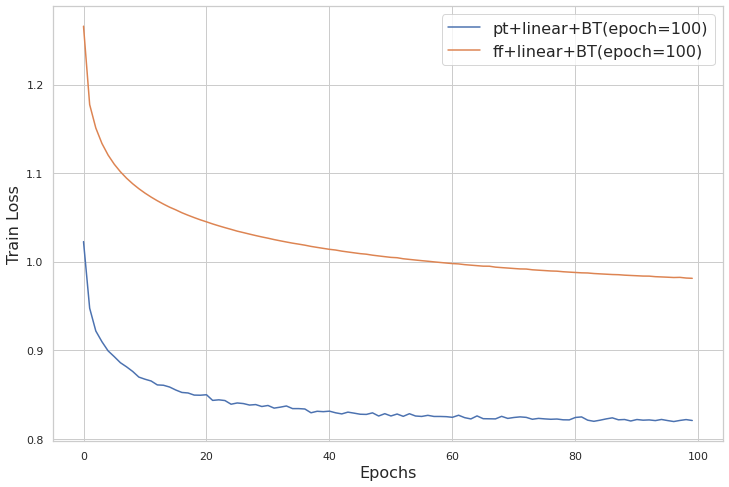

In [50]:
fig = plt.figure(figsize=(12, 8))

for res in data:
    plt.plot(data[res]['train_loss'], label='{}+linear+BT(epoch=100)'.format(res))
plt.xlabel(r'Epochs', fontsize=16)
plt.ylabel(r'Train Loss', fontsize=16)
plt.legend(fontsize=16)
plt.savefig('plots/loss_classify.png')

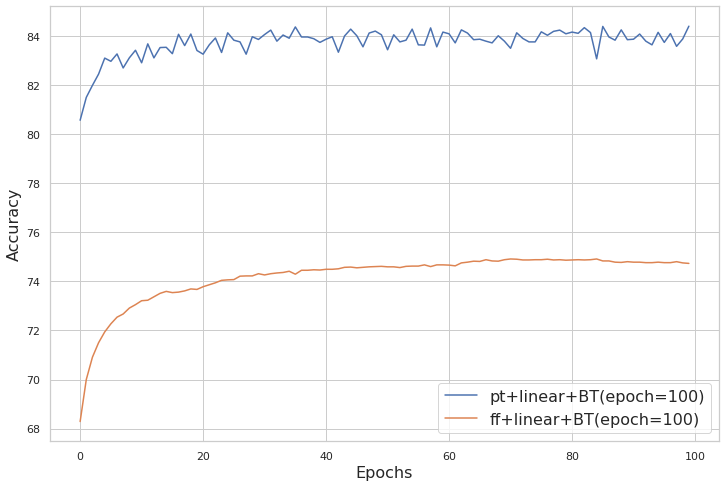

In [51]:
fig = plt.figure(figsize=(12, 8))
for res in data:
    plt.plot(data[res]['test_acc_1'], label='{}+linear+BT(epoch=100)'.format(res))
plt.xlabel(r'Epochs', fontsize=16)
plt.ylabel(r'Accuracy', fontsize=16)
plt.legend(fontsize=16)
plt.savefig('plots/acc_classify.png')

In [39]:
fname = os.path.join(FF_CKPTDIR, 'results_linear_100.json')
with open(fname, 'rb') as f:
    data = pickle.load(f)

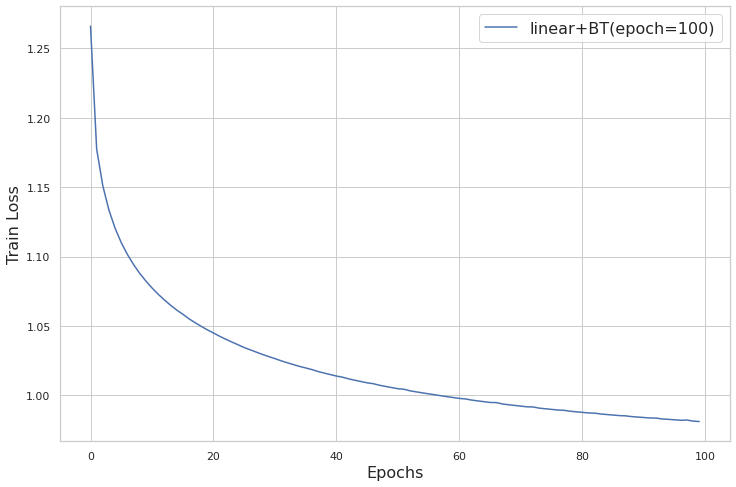

In [40]:
fig = plt.figure(figsize=(12, 8))
plt.plot(data['train_loss'], label='linear+BT(epoch=100)')
plt.xlabel(r'Epochs', fontsize=16)
plt.ylabel(r'Train Loss', fontsize=16)
plt.legend(fontsize=16)

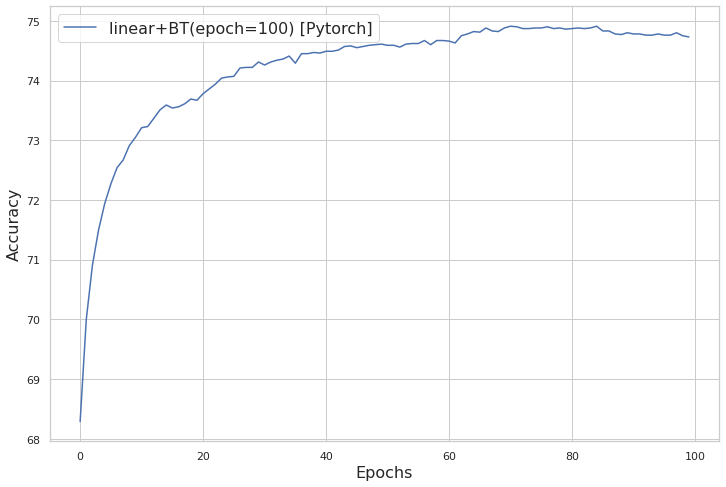

In [41]:
fig = plt.figure(figsize=(12, 8))
plt.plot(data['test_acc_1'], label='linear+BT(epoch=100) [Pytorch]')
plt.xlabel(r'Epochs', fontsize=16)
plt.ylabel(r'Accuracy', fontsize=16)
plt.legend(fontsize=16)

In [56]:
CKPTDIR = '/data/krishna/research/results/0322/007/checkpoints/lambd_0.100000_pdim_{}/'

In [70]:
data = {}

pdim = [128, 256, 512, 1024, 2048]
results = {k: CKPTDIR.format(k) for k in pdim}

for fwork, ckptdir in results.items():
    fname = os.path.join(ckptdir, 'results_linear_100.json')
    if os.path.exists(fname):
        with open(fname, 'rb') as f:
            data[fwork] = pickle.load(f)

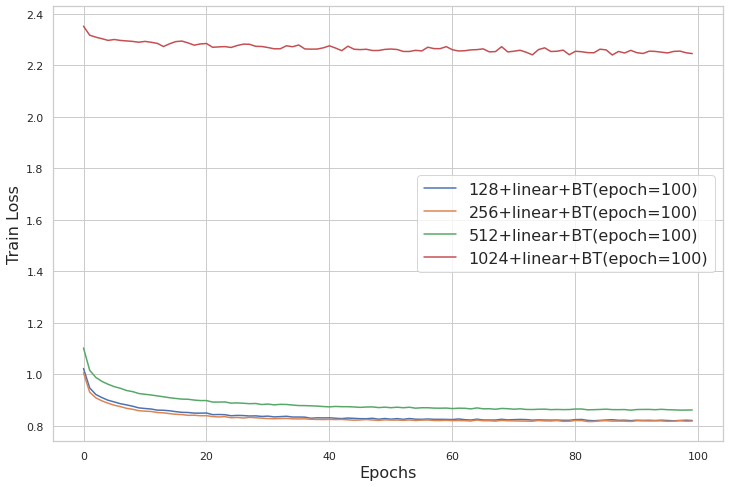

In [71]:
fig = plt.figure(figsize=(12, 8))

for res in data:
    plt.plot(data[res]['train_loss'], label='{}+linear+BT(epoch=100)'.format(res))
plt.xlabel(r'Epochs', fontsize=16)
plt.ylabel(r'Train Loss', fontsize=16)
plt.legend(fontsize=16)
# plt.savefig('plots/loss_classify.png')

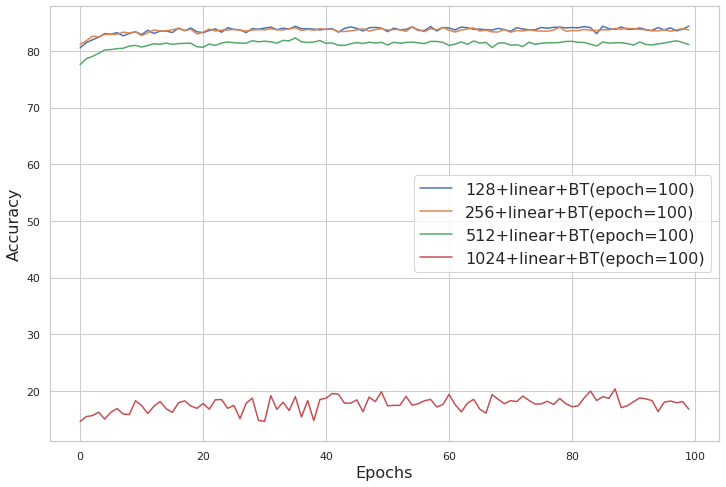

In [72]:
fig = plt.figure(figsize=(12, 8))
for res in data:
    plt.plot(data[res]['test_acc_1'], label='{}+linear+BT(epoch=100)'.format(res))
plt.xlabel(r'Epochs', fontsize=16)
plt.ylabel(r'Accuracy', fontsize=16)
plt.legend(fontsize=16)
# plt.savefig('plots/acc_classify.png')

In [6]:
CKPTDIR = '/data/krishna/research/results/0323/001/checkpoints/lambd_{:.6f}_pdim_512/'

In [21]:
data = {}
acc = {}
lambd = np.logspace(-4, 1, 6)
results = {k: CKPTDIR.format(k) for k in lambd}

for lambd, ckptdir in results.items():
    fname = os.path.join(ckptdir, 'results_linear_100.json')
    if os.path.exists(fname):
        with open(fname, 'rb') as f:
            data[lambd] = pickle.load(f)
            

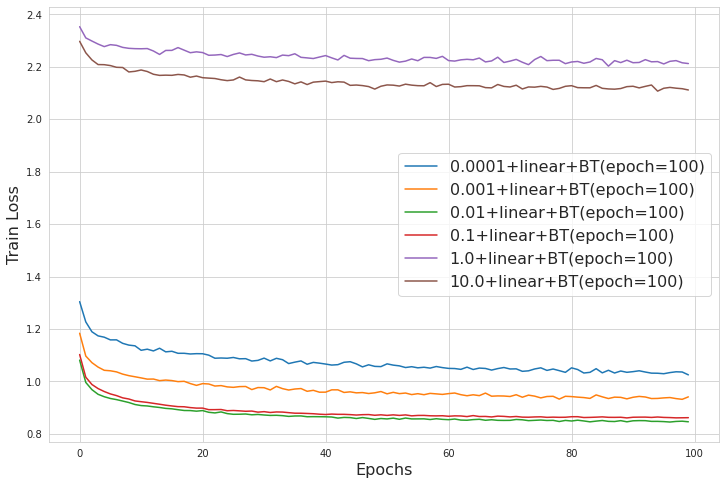

In [19]:
fig = plt.figure(figsize=(12, 8))

for res in data:
    plt.plot(data[res]['train_loss'], label='{}+linear+BT(epoch=100)'.format(res))
plt.xlabel(r'Epochs', fontsize=16)
plt.ylabel(r'Train Loss', fontsize=16)
plt.legend(fontsize=16)
# plt.savefig('plots/loss_classify.png')

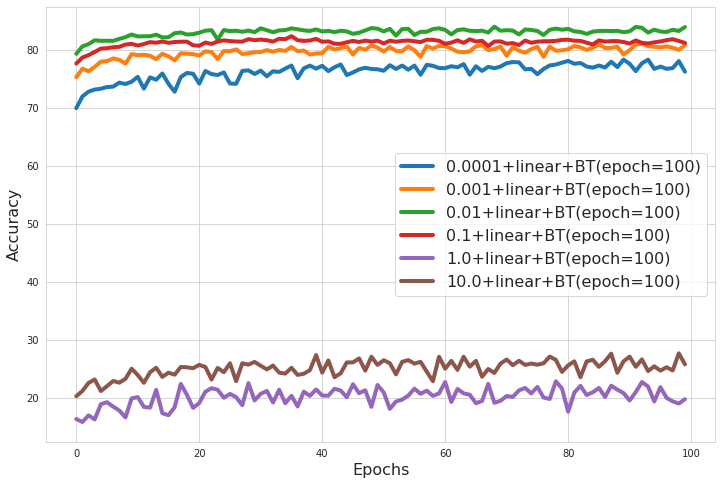

In [20]:
fig = plt.figure(figsize=(12, 8))
for res in data:
    plt.plot(data[res]['test_acc_1'], linewidth=4, label='{}+linear+BT(epoch=100)'.format(res))
plt.xlabel(r'Epochs', fontsize=16)
plt.ylabel(r'Accuracy', fontsize=16)
plt.legend(fontsize=16)
# plt.savefig('plots/acc_classify.png')

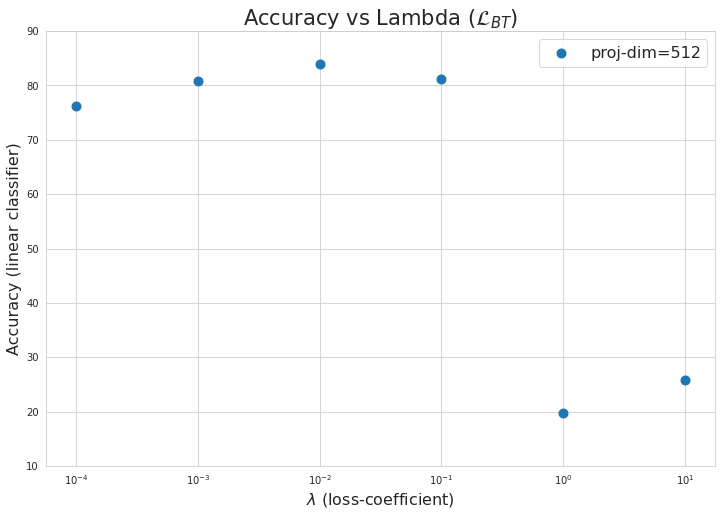

In [57]:
BTLOSS = "$\mathcal{L}_{BT}$"

fig = plt.figure(figsize=(12, 8))
acc = [val['test_acc_1'][-1] for val in data.values()]
plt.scatter(data.keys(), acc, linewidth=4, label='proj-dim=512')
plt.xscale('log')
plt.legend(fontsize=16)
plt.xlabel(r'$\lambda$ (loss-coefficient) ', fontsize=16)
plt.ylabel(r'Accuracy (linear classifier)', fontsize=16)
plt.ylim(10, 90)
plt.title(r'Accuracy vs Lambda ({})'.format(BTLOSS), fontsize=21)
plt.savefig('plots/acc_lambda_pdim_512.png')

In [62]:
CKPTDIR = '/data/krishna/research/results/0322/007/checkpoints/lambd_0.000010_pdim_{}/'

In [65]:
data = {}

pdim = [256, 512, 1024, 2048, 4096, 8192]
results = {k: CKPTDIR.format(k) for k in pdim}

for fwork, ckptdir in results.items():
    fname = os.path.join(ckptdir, 'results_linear_100.json')
    if os.path.exists(fname):
        with open(fname, 'rb') as f:
            data[fwork] = pickle.load(f)

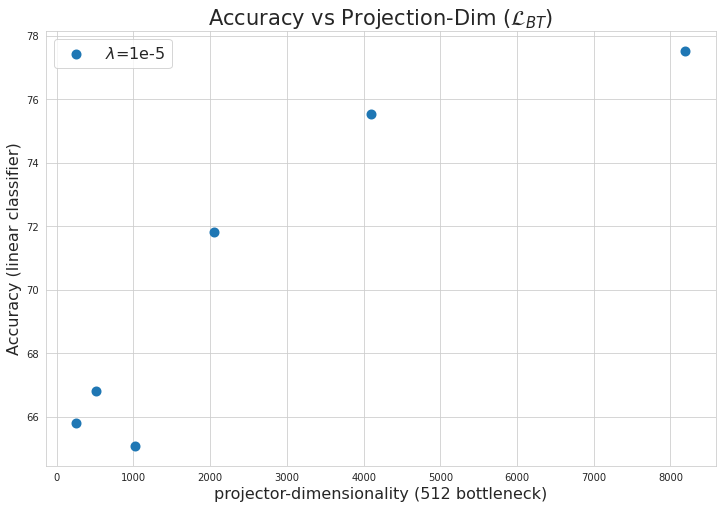

In [71]:
BTLOSS = "$\mathcal{L}_{BT}$"
LAMBDA = "$\lambda$ (loss-coefficient)"
PDIM = "projector-dimensionality (512 bottleneck)"

fig = plt.figure(figsize=(12, 8))
acc = [val['test_acc_1'][-1] for val in data.values()]
plt.scatter(data.keys(), acc, linewidth=4, label=r'$\lambda$=1e-5')
# plt.xscale('log')
plt.legend(fontsize=16)
plt.xlabel(PDIM, fontsize=16)
plt.ylabel(r'Accuracy (linear classifier)', fontsize=16)
# plt.ylim(10, 90)
plt.title(r'Accuracy vs Projection-Dim ({})'.format(BTLOSS), fontsize=21)
plt.savefig('plots/acc_lambda_1e-5_pdim.png')

In [61]:
data.keys()


dict_keys([])